In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('hour.csv')

## Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15489 entries, 0 to 15488
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      15489 non-null  object 
 1   season      15489 non-null  int64  
 2   yr          15489 non-null  int64  
 3   mnth        15489 non-null  int64  
 4   hr          15489 non-null  int64  
 5   holiday     15488 non-null  object 
 6   weekday     15489 non-null  int64  
 7   workingday  15489 non-null  int64  
 8   weathersit  15489 non-null  int64  
 9   temp        15489 non-null  float64
 10  atemp       15488 non-null  float64
 11  hum         15488 non-null  float64
 12  windspeed   15481 non-null  float64
 13  casual      15480 non-null  float64
 14  registered  15488 non-null  float64
 15  cnt         15489 non-null  int64  
dtypes: float64(6), int64(8), object(2)
memory usage: 1.9+ MB


In [4]:
df.describe()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15488.000000,15488.000000,15481.000000,15480.000000,15488.000000,15489.000000
mean,2.500678,0.503067,6.536316,11.537866,3.007489,0.683324,1.422300,0.496773,0.475513,0.626869,0.190360,35.752907,154.042743,189.764930
std,1.108821,0.500007,3.441304,6.908026,2.002889,0.465195,0.638022,0.192862,0.172128,0.193180,0.122767,49.238687,152.047287,182.087805
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.500000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday        object
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt             int64
dtype: object

## Check for invalid data, missing values and outliers

### Examine each feature by order

### 1. dteday

In [6]:
# dteday should be datetime format
df['date'] = df.apply(lambda row : pd.to_datetime(row['dteday']), axis=1)

ParserError: Unknown string format: "2011-01-01"

There is invalid datatype in column dteday, should change to the right format before converting to datetime

In [7]:
df['dteday'] = df.apply(lambda row: row['dteday'].replace('"', ''), axis=1)

In [8]:
df['date'] = df.apply(lambda row : pd.to_datetime(row['dteday']), axis=1)

##### For validation, verify if column 'yr' and 'mnth' are matching dteday

In [9]:
df['yr'].unique()

array([0, 1])

In [10]:
pd.Series.unique(df.apply(lambda row: 2011 if row['yr']==0 else 2012, axis=1)==df['date'].dt.year)

array([ True])

In [11]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
pd.Series.unique(df['mnth']==df['date'].dt.month)

array([ True])

### 2. season

In [13]:
# Season
df['season'].unique()

array([1, 2, 3, 4])

### 3. Hour

In [14]:
# Hour
sorted(df['hr'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

### 4. holiday

In [15]:
# Holiday
df['holiday'].unique()

array(['0', nan, '1', 'TRUE', 'FALSE'], dtype=object)

In [16]:
# There are different datatypes, as well as missing values in column holiday, so this column should be fixed
#identify missing value 
df[pd.isnull(df['holiday'])]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
5,1/1/2011,1,0,1,5,NaN,6,0,2,0.24,0.2576,0.75,0.0896,NaN,1.0,1,2011-01-01


In [17]:
# Only one missing row is identified, and the date is 2011-01-01, we can check whether this day is a holiday from the other rows on the same day
df[df['date']=='2011-01-01'].head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16,2011-01-01
1,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40,2011-01-01
2,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32,2011-01-01
3,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.0,10.0,13,2011-01-01
4,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0,1.0,1,2011-01-01


In [18]:
# As this day is not a holiday, we can impute 0 to the missing value
df.at[5, 'holiday'] = 0

In [19]:
# Transform TRUE/FALSE into 1/0 in holiday
df['holiday'] = df.apply(lambda row: 0 if row['holiday']=='0' or row['holiday']=='FALSE' else 1, axis=1)

### 5. weekday

In [20]:
# week day
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

### 6. working day

In [21]:
# working day
df['workingday'].unique()

array([0, 1])

### 7. weathersit

In [22]:
# weathersit
df['weathersit'].unique()

array([1, 2, 3, 4])

### 8. temperature

In [23]:
# Temperature
min(df['temp']), max(df['temp'])

(0.02, 1.0)

In [24]:
# Check if there is missing value, 0 means no missing value
df['temp'].isnull().sum()

0

### 9. atemp

In [25]:
# atemp
min(df['atemp']), max(df['atemp'])

(0.0, 1.0)

In [26]:
df['atemp'].isnull().sum()

1

In [27]:
# Check missing value
df[df['atemp'].isnull()]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
7461,12/21/2011,1,0,12,0,0,3,1,2,0.34,NaN,0.71,0.1343,7.0,18.0,25,2011-12-21


In general feeling temperature should be close to feeling temperature from the previous hour and next hour 
so we can impute the missing value by taking average of previous and next hours

In [53]:
# Validate and examine atemp value
df[df['date'].isin(['2011-12-20', '2011-12-21'])]['atemp']

7439    0.36360
7440    0.37880
7441    0.36360
7442    0.36360
7443    0.36360
7444    0.37880
7445    0.37880
7446    0.37880
7447    0.42420
7448    0.37880
7449    0.42420
7450    0.43940
7451    0.43940
7452    0.43940
7453    0.43940
7454    0.40910
7455    0.39390
7456    0.39390
7457    0.37880
7458    0.36360
7459    0.37880
7460    0.39390
7461    0.37875
7462    0.36360
7463    0.37880
7464    0.37880
7465    0.37880
7466    0.39390
7467    0.37880
7468    0.36360
7469    0.37880
7470    0.40910
7471    0.46970
7472    0.46970
7473    0.45450
7474    0.43940
7475    0.46970
7476    0.43940
7477    0.43940
7478    0.43940
7479    0.48480
7480    0.48480
7481    0.48480
7482    0.48480
7483    0.48480
Name: atemp, dtype: float64

atemp values from consecutive hours do have close values, so we could take the average

In [96]:
df.at[7461, 'atemp'] = 0.5*(df[df.index==7460]['atemp'].values[0]+df[df.index==7462]['atemp'].values[0])

### 10. humidity

In [37]:
# Humidity
min(df['hum']), max(df['hum'])

(0.0, 1.0)

In [38]:
df['hum'].isnull().sum()

1

There is also one missing value for humidity, let's examine the missing row

In [39]:
df[df['hum'].isnull()]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
18,1/1/2011,1,0,1,20,0,6,0,2,0.4,0.4091,NaN,0.2537,11.0,25.0,36,2011-01-01


In [40]:
# Check the data on day 2011-01-01
df[df['date']=='2011-01-01']

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3.0,13.0,16,2011-01-01
1,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8.0,32.0,40,2011-01-01
2,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5.0,27.0,32,2011-01-01
3,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3.0,10.0,13,2011-01-01
4,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0.0,1.0,1,2011-01-01
5,1/1/2011,1,0,1,5,1,6,0,2,0.24,0.2576,0.75,0.0896,NaN,1.0,1,2011-01-01
6,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2.0,NaN,2,2011-01-01
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1.0,2.0,3,2011-01-01
8,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1.0,7.0,8,2011-01-01
9,1/1/2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8.0,6.0,14,2011-01-01


With the same argument, we can impute the missing value by averaging the humidity from the previous and next hour

In [44]:
# 0.5*(df[df.index==17]['hum'].values[0]+df[df.index==19]['hum'].values[0]) = 0.875
df.at[18, 'hum'] = 0.5*(df[df.index==17]['hum'].values[0]+df[df.index==19]['hum'].values[0])

### 11. wind speed

In [35]:
# Wind speed
min(df['windspeed']), max(df['windspeed'])

(0.0, 0.8507)

In [36]:
df['windspeed'].isnull().sum()

8

In [37]:
df[df['windspeed'].isnull()]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
4358,7/27/2011,3,0,7,11,0,3,1,1,0.80,0.6970,0.31,NaN,42.0,94.0,136,2011-07-27
7210,12/9/2011,4,0,12,3,0,5,1,1,0.22,0.2727,0.80,NaN,1.0,5.0,6,2011-12-09
7463,12/21/2011,1,0,12,2,0,3,1,2,0.36,0.3788,0.71,NaN,NaN,4.0,4,2011-12-21
8959,2/28/2012,1,1,2,19,0,2,1,1,0.42,0.4242,0.26,NaN,15.0,291.0,306,2012-02-28
9402,3/20/2012,1,1,3,21,0,2,1,1,0.56,0.5303,0.73,NaN,38.0,239.0,277,2012-03-20
13608,10/3/2012,4,1,10,21,0,3,1,2,0.66,0.6212,0.74,NaN,14.0,195.0,209,2012-10-03
13984,10/21/2012,4,1,10,8,0,0,0,1,0.42,0.4242,0.67,NaN,39.0,104.0,143,2012-10-21
14001,10/22/2012,4,1,10,3,0,1,1,1,0.40,0.4091,0.62,NaN,1.0,5.0,6,2012-10-22


Using the same argument, we can also impute the missing wind speed from the average of previous and next hour

In [45]:
for i in (df[df['windspeed'].isnull()].index): 
    df.at[i, 'windspeed'] = 0.5*(df[df.index==i-1]['windspeed'].values[0]+df[df.index==i+1]['windspeed'].values[0])

### 12. .Casual, registered and cnt

In [46]:
df['casual'].isnull().sum(), df['registered'].isnull().sum(), df['cnt'].isnull().sum()

(9, 1, 0)

There are 9 rows with missing casual values
We know that casual + registered = cnt, so the imputation is simple, casual = cnt - registered

In [47]:
df['casual'] = np.where(df['casual'].isnull, df['cnt']-df['registered'], df['casual'])
df['registered'] = np.where(df['registered'].isnull, df['cnt']-df['casual'], df['registered'])

In [48]:
# Validate missing values again
df['casual'].isnull().sum(), df['registered'].isnull().sum(), df['cnt'].isnull().sum()

(1, 1, 0)

In [49]:
df[df['casual'].isnull()]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
6,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0.0,NaN,NaN,2,2011-01-01


In [50]:
# Since there is no additional information for casual and registered users, and total user count is 2, we can assign 
# 1 user to casual and 1 user to registered
df.at[6, 'casual'] = 1
df.at[6, 'registered'] = 1

## Outliers analysis                    

<AxesSubplot:>

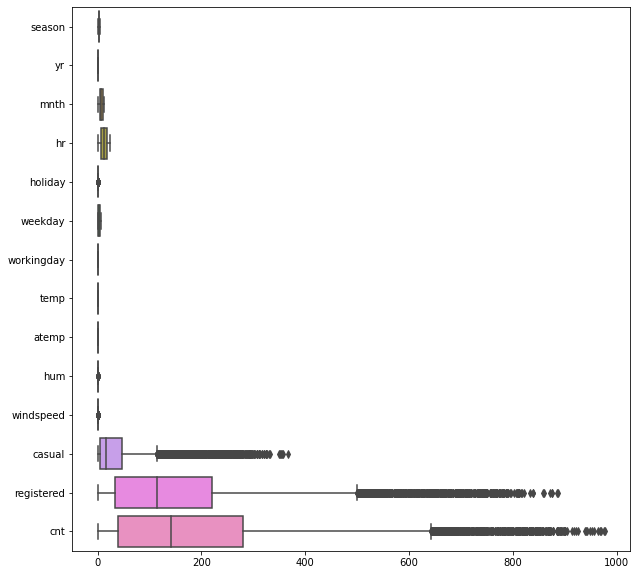

In [74]:
fig = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']] ,orient="h")

There are outliers on 'cnt' that skew the distribution towards right, those outliers should be removed
But we can also check how outliers are distributed in each feature

[Text(0.5, 0, 'Week Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

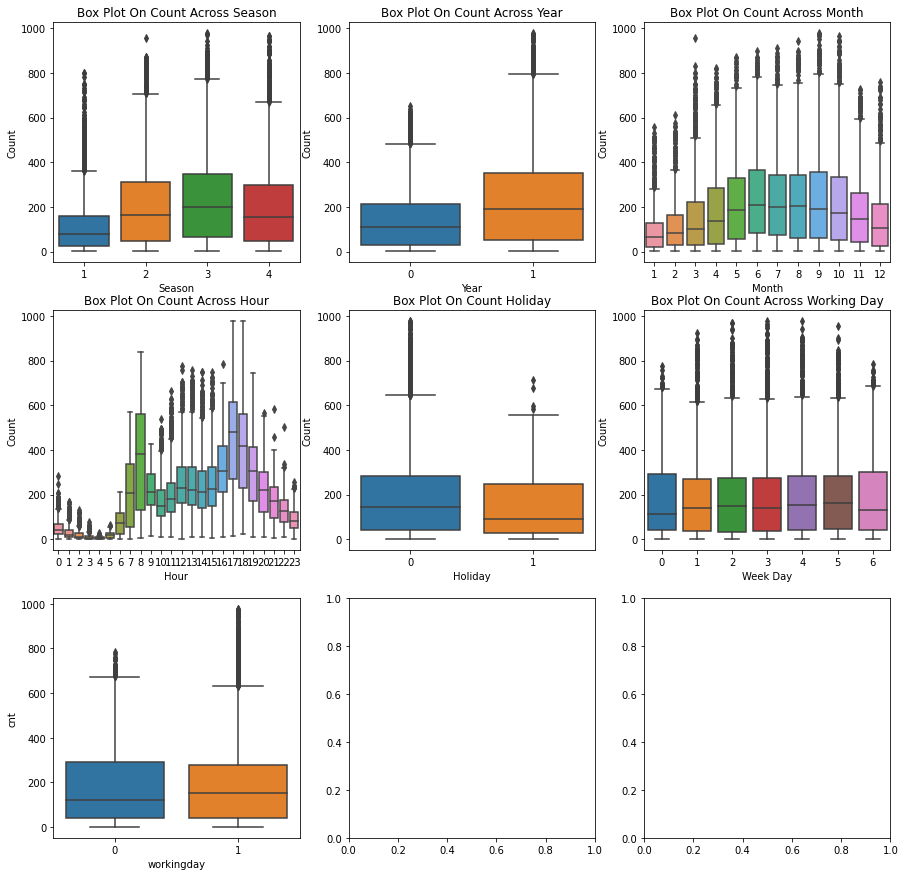

In [91]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15, 15)

sns.boxplot(data=df,y="cnt",x="season",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="yr",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="cnt",x="mnth",orient="v",ax=axes[0][2])
sns.boxplot(data=df,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="cnt",x="holiday",orient="v",ax=axes[1][1])
sns.boxplot(data=df,y="cnt",x="weekday",orient="v",ax=axes[1][2])
sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[2][0])

axes[0][0].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][1].set(xlabel='Year', ylabel='Count',title="Box Plot On Count Across Year")
axes[0][2].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Month")
axes[1][0].set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hour")
axes[1][1].set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Holiday")
axes[1][2].set(xlabel='Week Day', ylabel='Count',title="Box Plot On Count Across Week Day")
axes[1][2].set(xlabel='Week Day', ylabel='Count',title="Box Plot On Count Across Working Day")

A few findings could be drawn here
1. Count from Spring season is relatively lower compared to the other seasons. Most likely it is because that the weather is colder and riding bike is not preferred. 
2. Similarly, colder months have less count than warmer months. 
3. For Hour of the day, counts are peaked at 7AM-8AM and 5PM-6PM. Most likely it is because people are using ride share service to go to school or work, or get back home from school/work
4. Most of the outliers come from Non-holiday, weekdays and working days, and mostly come during working/school hours

## Remove outliers

In [92]:
dfWithoutOutliers = df[np.abs(df['cnt']-df['cnt'].mean())<=(3*df['cnt'].std())] 

Count data size before and after outliers removal

In [95]:
print("Data size before outlier removal: {}".format(len(df)))
print("Data size after outlier removal: {}".format(len(dfWithoutOutliers)))
print("Total size of removed data: {}".format(len(df)-len(dfWithoutOutliers)))

Data size before outlier removal: 15489
Data size after outlier removal: 15265
Total size of removed data: 224


## Correlation Analysis

Features (variables) could have dependencies against the other features, one way to identify them is to calculate correlation matrix between them. 

<AxesSubplot:>

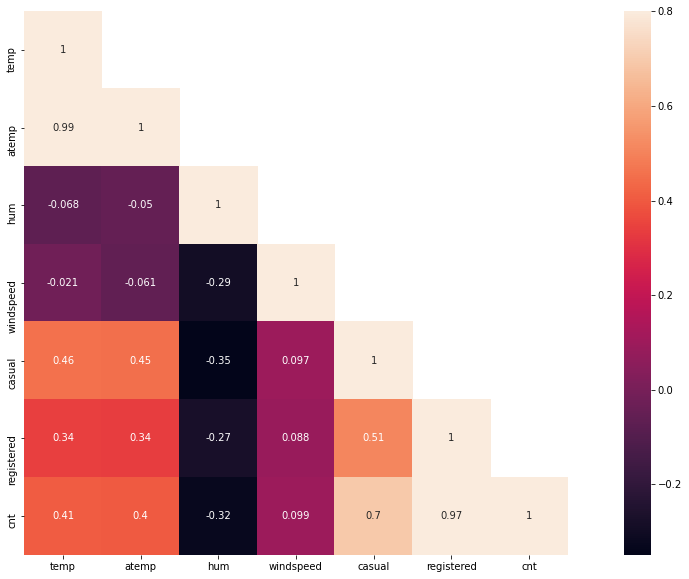

In [99]:
corrMatt = df[["temp","atemp","hum","windspeed","casual","registered", "cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

Plot between temp and atemp

Text(0.5, 1.0, 'Relation between temp and atemp')

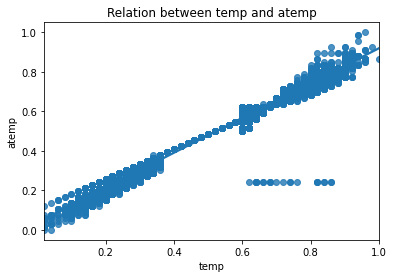

In [103]:
sns.regplot(x=df['temp'], y=df['atemp'])
plt.title("Relation between temp and atemp")

## Some findings from correlation mat
1. Casual and Registered are both partially contributing to the count value, so they shouldn't be considered during model training
2. "temp" and "atemp" are strongly correlated to each other, one of the variables should be dropped during training. In this proect "temp" is kept and "atemp" is dropped. The scatter plot also shows that they have strong linear correlation
3. Wind speed is not really influencing count value
4. Humidity is negatively correlated to count, because when weather is humid it's less likely people go outside

## Data Visualization

### Count Distribution

((array([-3.91391089, -3.69436884, -3.57408915, ...,  3.57408915,
          3.69436884,  3.91391089]),
  array([  1,   1,   1, ..., 734, 734, 736])),
 (156.9023724587927, 180.4951195545365, 0.9433233967738789))

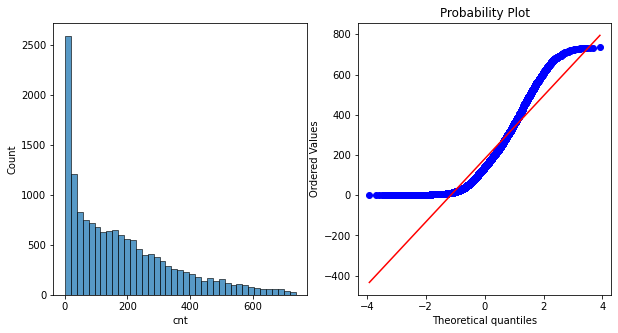

In [122]:
fig,axes = plt.subplots(ncols=2,nrows=1)
fig.set_size_inches(10, 5)
sns.histplot(dfWithoutOutliers["cnt"],ax=axes[0])
stats.probplot(dfWithoutOutliers["cnt"], dist='norm', fit=True, plot=axes[1])

The data is highly skewed, distribution is nowhere close to normal distribution. We can try transform the data with log function.

((array([-3.91391089, -3.69436884, -3.57408915, ...,  3.57408915,
          3.69436884,  3.91391089]),
  array([0.        , 0.        , 0.        , ..., 6.59850903, 6.59850903,
         6.60123012])),
 (1.4101495308132692, 4.504273607770961, 0.9562729385762625))

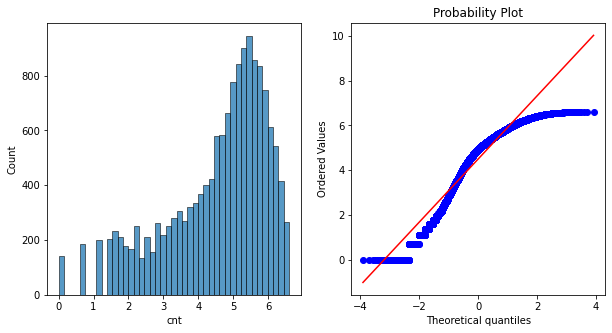

In [134]:
fig2,axes2 = plt.subplots(ncols=2,nrows=1)
fig2.set_size_inches(10, 5)
sns.histplot(np.log(dfWithoutOutliers["cnt"]),ax=axes2[0])
stats.probplot(np.log(dfWithoutOutliers["cnt"]), dist='norm', fit=True, plot=axes2[1])

After log transformation distribution looks better but still not normally distributed

### Count against categorical variables

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

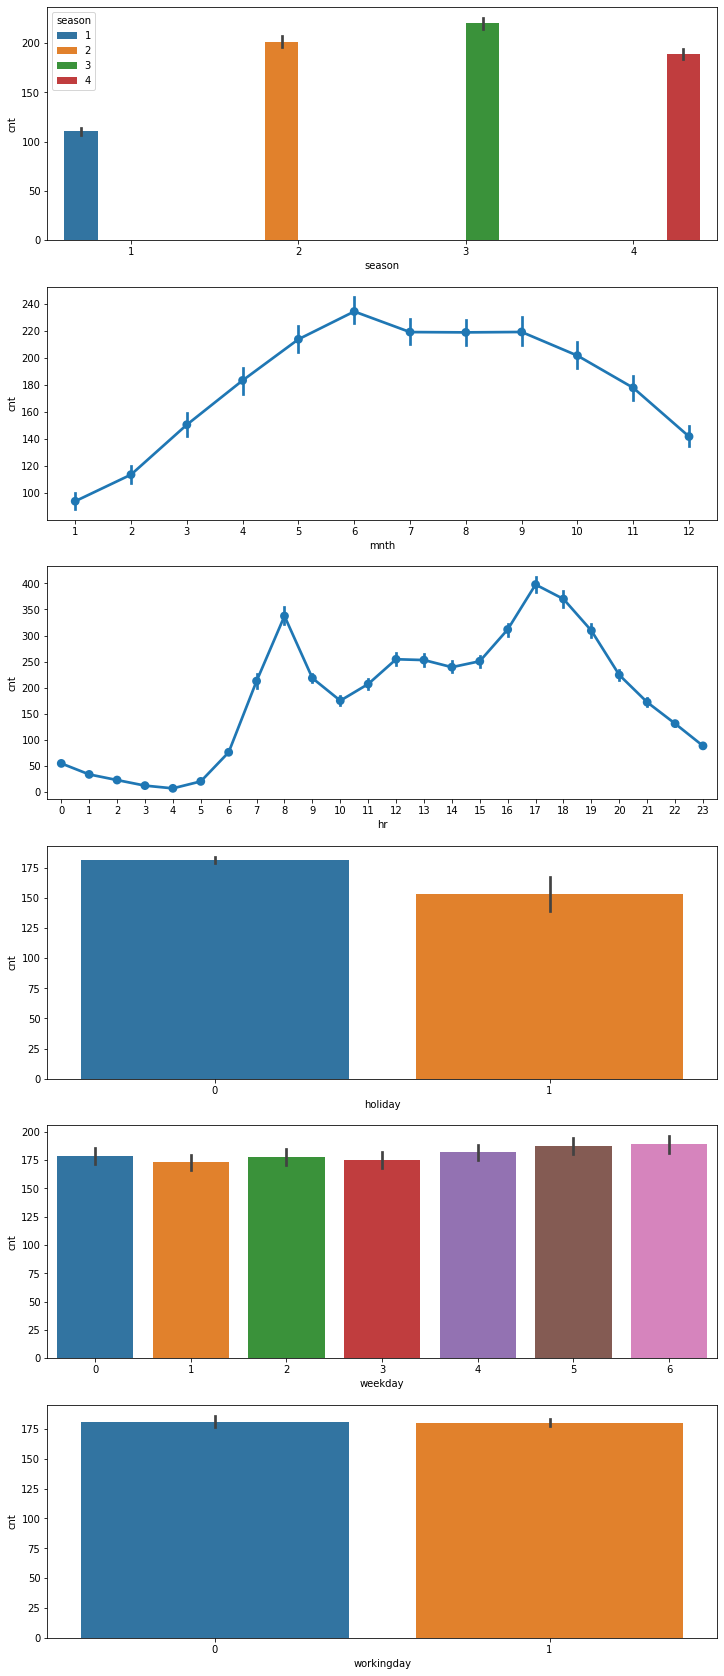

In [155]:
fig,(ax1,ax2,ax3,ax4, ax5, ax6)= plt.subplots(nrows=6)
fig.set_size_inches(12,30)

sns.barplot(data=dfWithoutOutliers, x='season', y='cnt', ax=ax1, hue='season')
sns.pointplot(data=dfWithoutOutliers, x='mnth', y='cnt', ax=ax2)
sns.pointplot(data=dfWithoutOutliers, x='hr', y='cnt', ax=ax3)
sns.barplot(data=dfWithoutOutliers, x='holiday', y='cnt', ax=ax4)
sns.barplot(data=dfWithoutOutliers, x='weekday', y='cnt', ax=ax5)
sns.barplot(data=dfWithoutOutliers, x='workingday', y='cnt', ax=ax6)

Categorical distributions are discussed previously during outliers analysis, not repeating it here

### Breakdown count by multiple categorical variables

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across weathersit'),
 None]

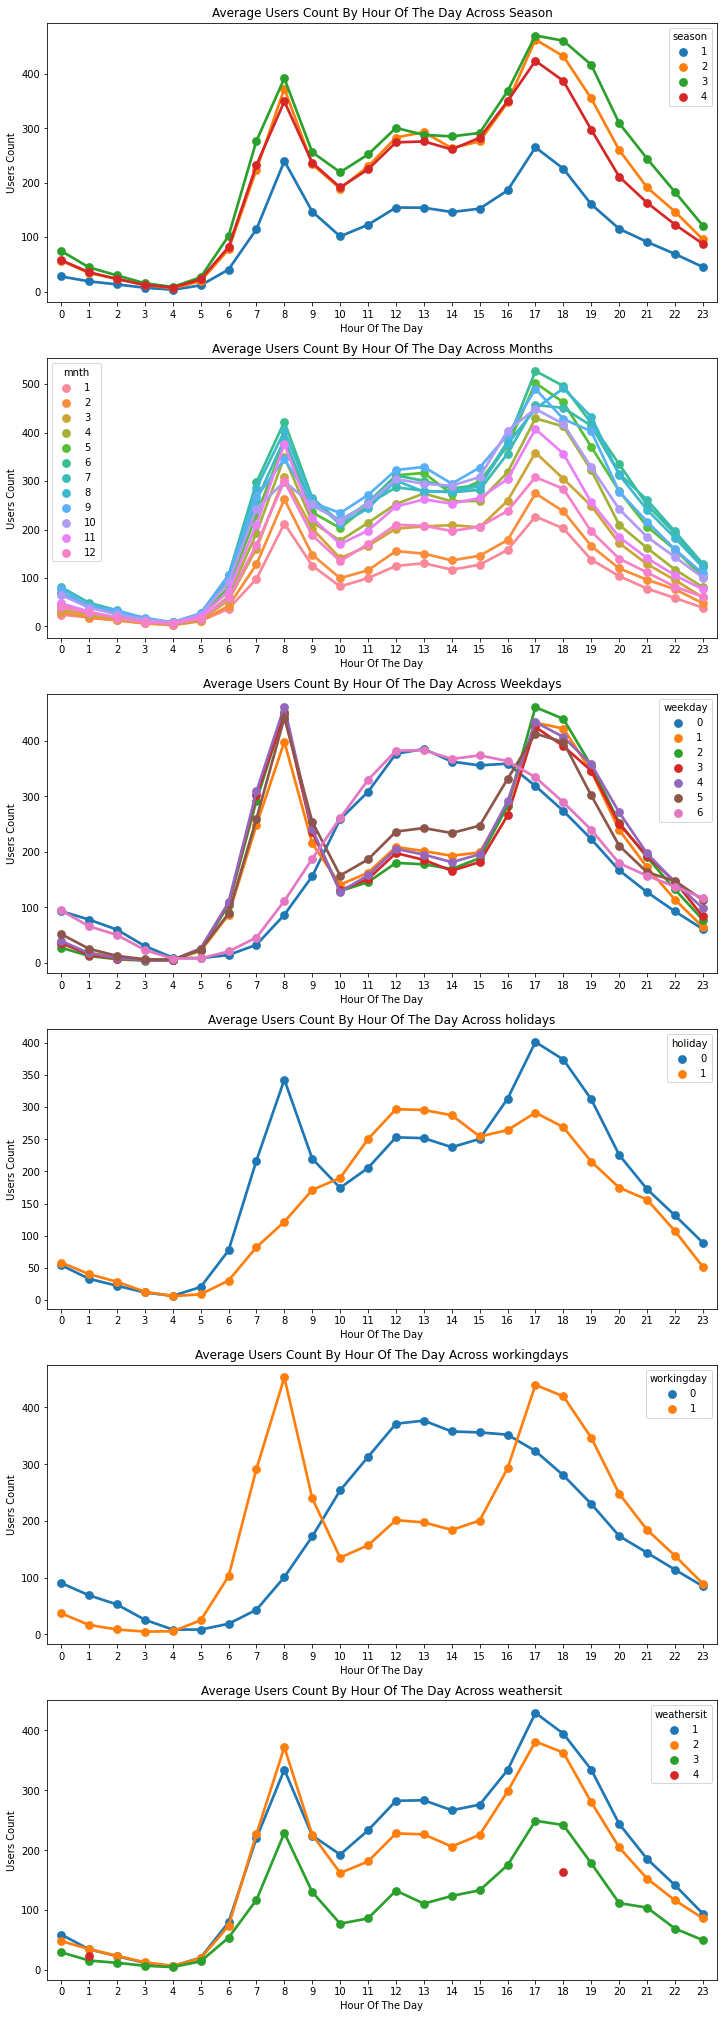

In [176]:
fig,(ax1,ax2, ax3, ax4, ax5, ax6)= plt.subplots(nrows=6)
fig.set_size_inches(12,36)

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(['hr','season'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(data=hourAggregated, x='hr', y='cnt',hue='season', join=True,ax=ax1)
ax1.set(xlabel='Hour Of The Day', ylabel='Users Count',title='Average Users Count By Hour Of The Day Across Season',label='big')

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(['hr', 'mnth'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["mnth"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title='Average Users Count By Hour Of The Day Across Months',label='big')

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(['hr','weekday'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["weekday"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title='Average Users Count By Hour Of The Day Across Weekdays',label='big')

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(['hr','holiday'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["holiday"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title='Average Users Count By Hour Of The Day Across holidays',label='big')

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(['hr','workingday'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["workingday"], data=hourAggregated, join=True,ax=ax5)
ax5.set(xlabel='Hour Of The Day', ylabel='Users Count',title='Average Users Count By Hour Of The Day Across workingdays',label='big')

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(['hr','weathersit'],sort=True)['cnt'].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["weathersit"], data=hourAggregated, join=True,ax=ax6)
ax6.set(xlabel='Hour Of The Day', ylabel='Users Count',title='Average Users Count By Hour Of The Day Across weathersit',label='big')


From the diagrams above, we can tell that the trend of hourly distribution is similar against different season or month. 

However, hourly trend for weekday and weekend is different. During weekday we can see two peaks at 7AM-8AM, and 5PM-6PM. As discussed before, many people use bike sharing service to go to school/work and get back home. The plot of holiday and working day also support this conclusion. 

from the last diagram, when weather condition is bad, no one is using bike sharing service.  

We've finished with basic data clean up and analysis, and ready for model training

## Model Training

### Define features to use

In [217]:
cateFeatures = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
numericFeatures = ['temp', 'hum', 'windspeed'] ## atemp, casual, registered are dropped

### Feature Normalization
Since all numerical features are normalized to be between 0 and 1, this step is not needed

### Label Normalization
Distribution of log(cnt) is better than cnt itself, we are converting cnt to log(cnt) as label

In [216]:
dfWithoutOutliers['count']=dfWithoutOutliers.apply(lambda row:np.log(row['cnt']), axis=1)

<ipython-input-216-472a88bcee62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWithoutOutliers['count']=dfWithoutOutliers.apply(lambda row:np.log(row['cnt']), axis=1)


In [218]:
label = ['count']

### Transform categorical features into dummy variables

In [219]:
seasonDF = pd.get_dummies(dfWithoutOutliers['season'].astype('category'), prefix='season')
yrDF = pd.get_dummies(dfWithoutOutliers['yr'].astype('category'), prefix='yr')
mnthDF = pd.get_dummies(dfWithoutOutliers['mnth'].astype('category'), prefix='mnth')
hrDF = pd.get_dummies(dfWithoutOutliers['hr'].astype('category'), prefix='hr')
holidayDF = pd.get_dummies(dfWithoutOutliers['holiday'].astype('category'), prefix='holiday')
weekdayDF = pd.get_dummies(dfWithoutOutliers['weekday'].astype('category'), prefix='weekday')
workingdayDF = pd.get_dummies(dfWithoutOutliers['workingday'].astype('category'), prefix='workingday')
weathersitDF = pd.get_dummies(dfWithoutOutliers['weathersit'].astype('category'), prefix='weathersit')

In [220]:
dfXForModel = dfWithoutOutliers[numericFeatures].join(seasonDF).join(yrDF).join(mnthDF).join(hrDF) \
.join(holidayDF).join(weekdayDF).join(workingdayDF).join(weathersitDF)
dfYForModel = dfWithoutOutliers[label]

In [221]:
dfXForModel

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,0.0000,1,0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.80,0.0000,1,0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.80,0.0000,1,0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.75,0.0000,1,0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.75,0.0000,1,0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15484,0.26,0.48,0.1343,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
15485,0.26,0.60,0.1642,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
15486,0.26,0.60,0.1642,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
15487,0.26,0.60,0.1642,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


### Split data into Train/Test set

In [260]:
from sklearn.model_selection import train_test_split

In [223]:
X = dfXForModel.values
Y = dfYForModel.values

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Model Training

### Try out model candidates

In [247]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_log_error

In [254]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR']
rmsle=[]
modelMap = {}
for model in range (len(models)):
    regressor=models[model]
    regressor.fit(X_train,y_train.ravel())
    prediction=regressor.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(prediction,y_test))
    modelMap[model_names[model]] = regressor
    print(" Model: {}, rmsle = {}".format(model_names[model], rmsle))

 Model: RandomForestRegressor, rmsle = 0.12237303984317288
 Model: AdaBoostRegressor, rmsle = 0.25935927223938804
 Model: BaggingRegressor, rmsle = 0.12663414660240527
 Model: SVR, rmsle = 0.11694396298747176


Linear Regressor and MLP were tried but negative counts were predicted, so they are not taken into account for model candidates for further fine tune. 

Out of the tested models, Support Vector Regressor gives the best result, i.e., the least root mean squared log error. 
We will chhoose SVR as the final model

# Final Model: support vector regressor

### Prediction

In [249]:
# To Predict ride count given input features

In [255]:
regressor = modelMap['SVR']

In [257]:
prediction = np.exp(regressor.predict(X_test))

In [258]:
prediction

array([ 83.2211366 ,   2.49419476,  81.45175892, ..., 156.80044902,
       162.40663679, 284.32040264])